# Assignment 2 - Machine Learning Basics

## *Danny Witt*
Netid:  *drw48*

Github link: 

Gitlab link:

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.**

**ANSWER**

In all cases, if the underlying relationship (F(x)) between response variable vs. predictor variables is linear, then less flexible learning methods will perform best. However, as these relationships become non-linear, the decrease in bias in a more flexible model may yield lower mean error rates. However, we rarely know the F(x) relationship so the following logic applies:

**1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.**

A more flexible model would perform better as the higher flexibility will allow the model to better fit the large number of data points (which we are not as worried about overfitting given the "extremely large" size). 

**2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.**

A more flexible model will perform worse in this case of extremely large p and small n. Given, the small sample size the more flexible model would be at risk of overfitting the small number of observations and not performing well on predicting new test data. 

**3. The relationship between the predictors and response is highly non-linear.**

A more flexible model would perform better in the case of a highly non-linear relationship between predictors and response variable. More flexible models with higher degrees of freedom are able to depart from a linear model fit and better capture non-linear relationships between predictors/response. 

(d) worse - flexible methods fit to the noise in the error terms and increase variance

**4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high**

The flexible method will perform worse than the inflexible method. In this case, the flexible method will overfit to the data. The large variance of the error terms suggests that while bias may decrease in a transition from an inflexible (i.e., simple regression) to a more flexible learning method, the overall increase in model variance will increase the error associated with subsequent test response variable prediction. 

### 2
**[5 points] For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.**

**ANSWER**

**(a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.**

(i) regression problem; continuous response variable 

(ii) inference

(iii) n = 500, p = 3

**(b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.**

(i) classification problem; binary response variable (success or failure)

(ii) prediction

(iii) n = 20, p = 13

**(c) We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.**

(i) regression problem; continuous response variable 

(ii) prediction

(iii) n = 52, p = 3

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [146]:
#Part (a): Write your own kNN classifier

from scipy.spatial.distance import cdist
from scipy.stats import mode
import numpy as np

class Knn:
    
# k-Nearest Neighbor class object for classification training and testing
  def __init__(self):
      pass

  def fit(self, X_train, y_train):
      # Save the training data to properties of this class
      self.X_train = X_train
      self.y_train = y_train
      return

  def predict(self, X_test, k):
      y_hat = [] # Variable to store the estimated class label for

      # Calculate the distance from each vector in x to the training data
      distances = cdist(self.X_train, X_test)
      idx = np.argpartition(distances, k, axis = 0)[:k]
      closest_distances = np.take(self.y_train, idx)
      y_hat = mode(closest_distances, axis = 0)[0]
      y_hat = np.concatenate(y_hat)

      # Return the estimated targets
      return y_hat

######################################################################################################################
#Testing Data:
######################################################################################################################

#import os
#import csv
#import sklearn
#from sklearn.metrics import accuracy_score

##Input the data:

#data_directory = "/Users/dannywitt/Desktop/MIDS/IDS_705_ML/ids705/assignments/data/"
#os.chdir(data_directory)

#with open('A2_X_train_low.csv', newline='') as csvfile:
    #X_train_low = np.array(list(csv.reader(csvfile)))
    
#with open('A2_y_train_low.csv', newline='') as csvfile:
    #y_train_low = np.array(list(csv.reader(csvfile)))
#with open('A2_X_test_low.csv', newline='') as csvfile:
    #X_test_low = np.array(list(csv.reader(csvfile)))

#with open('A2_y_test_low.csv', newline='') as csvfile:
    #y_test_low = np.array(list(csv.reader(csvfile)))

##Fitting/training KNN model to data and generating predicted classifications:

#KNN = Knn()
#KNN.fit(X_train_low, y_train_low)
##print(KNN.X_train)
##print(KNN.Y_train)

#y_predictions = KNN.predict(X_test_low, k = 10)
##print(y_predictions)
##print(len(y_predictions))

#Measure accuracy of classifier: 
#Accuracy_score = accuracy_score(y_test_low, y_predictions)
#print('Accuracy = {:.2f}%'.format(Accuracy_score*100))

In [147]:
#Parts (b) and (c): train "from-scratch" k-NN (from Part A) and scikit-learn k-NN models on both low- and 
#high-dimensional data:

# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset and time the predictions 
# of each model.

import os
import csv
import time
import sklearn
from sklearn.metrics import accuracy_score

#Import the low-dim data:

data_directory = "/Users/dannywitt/Desktop/MIDS/IDS_705_ML/ids705/assignments/data/"
os.chdir(data_directory)

with open('A2_X_train_low.csv', newline='') as csvfile:
    X_train_low = np.array(list(csv.reader(csvfile)))
    
with open('A2_y_train_low.csv', newline='') as csvfile:
    y_train_low = np.array(list(csv.reader(csvfile)))

with open('A2_X_test_low.csv', newline='') as csvfile:
    X_test_low = np.array(list(csv.reader(csvfile)))

with open('A2_y_test_low.csv', newline='') as csvfile:
    y_test_low = np.array(list(csv.reader(csvfile)))

In [148]:
#From-scratch k-NN model for low-dimensional data:

#Start Timer (t0):
t0 = time.time()

#Fit/train:
KNN_scratch_low_dim = Knn()
KNN_scratch_low_dim.fit(X_train_low, y_train_low)
#print(KNN.X_train)
#print(KNN.Y_train)
y_predictions = KNN_scratch_low_dim.predict(X_test_low, k = 5)
#print(y_predictions)
#print(len(y_predictions))

#Measure accuracy of classifier for low-dimensional data: 
KNN_scratch_low_dim_accuracy = accuracy_score(y_test_low, y_predictions)
print('Accuracy Low-Dim "from-scratch" k-NN = {:.2f}%'.format(KNN_scratch_low_dim_accuracy * 100))

#Stop Timer (t1):
t1 = time.time()
total_time_low_dim_scratch_knn = t1 - t0

print('Time of "from-scratch" k-NN on low-dimensional data: {:.3f} seconds'.format(total_time_low_dim_scratch_knn))

Accuracy Low-Dim "from-scratch" k-NN = 92.50%
Time of "from-scratch" k-NN on low-dimensional data: 0.037 seconds


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [149]:
# scikit learn KNeighborsClassifier for low-dimensional data:

import sklearn
from sklearn.neighbors import KNeighborsClassifier

#Start Timer (t0):
t0 = time.time()

KNN_scikitlearn_low_dim = KNeighborsClassifier(n_neighbors = 5)

KNN_scikitlearn_low_dim.fit(X_train_low, y_train_low)
y_predictions = KNN_scikitlearn_low_dim.predict(X_test_low.reshape(1000,2))

#Measure accuracy of classifier for low-dimensional data: 
KNN_scikitlearn_low_dim_accuracy = accuracy_score(y_test_low, y_predictions)
print('Accuracy Low-Dim Scikit-learn KNeighborsClassifer (k-NN) = {:.2f}%'.format(KNN_scikitlearn_low_dim_accuracy*100))

#Stop Timer (t1):
t1 = time.time()
total_time_low_dim_scikitlearn_knn = t1 - t0

print('Time of Scikit-learn KNeighborsClassifier (k-NN) on low-dimensional data: {:.3f} seconds'.format(total_time_low_dim_scikitlearn_knn))

Accuracy Low-Dim Scikit-learn KNeighborsClassifer (k-NN) = 92.50%
Time of Scikit-learn KNeighborsClassifier (k-NN) on low-dimensional data: 0.014 seconds


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.floa

In [150]:
#High-dimensional data:

import os
import csv

#Import dataset:

with open('A2_X_train_high.csv', newline='') as csvfile:
    X_train_high = np.array(list(csv.reader(csvfile)))
    
with open('A2_y_train_high.csv', newline='') as csvfile:
    y_train_high = np.array(list(csv.reader(csvfile)))

with open('A2_X_test_high.csv', newline='') as csvfile:
    X_test_high = np.array(list(csv.reader(csvfile)))

with open('A2_y_test_high.csv', newline='') as csvfile:
    y_test_high = np.array(list(csv.reader(csvfile))) 

In [151]:
#From-scratch k-NN model for high-dimensional data:

import time
import sklearn
from sklearn.metrics import accuracy_score

#Start Timer (t0):
t0 = time.time()

#Fit/train:
KNN_scratch_high_dim = Knn()
KNN_scratch_high_dim.fit(X_train_high, y_train_high)
#print(KNN.X_train)
#print(KNN.Y_train)
y_predictions = KNN_scratch_high_dim.predict(X_test_high, k = 5)
#print(y_predictions)
#print(len(y_predictions))

#Measure accuracy of classifier for low-dimensional data: 
KNN_scratch_high_dim_accuracy = accuracy_score(y_test_high, y_predictions)
print('Accuracy High-Dim "from-scratch" k-NN = {:.2f}%'.format(KNN_scratch_high_dim_accuracy * 100))

#Stop Timer (t1):
t1 = time.time()
total_time_high_dim_scratch_knn = t1 - t0

print('Time of "from-scratch" k-NN on high-dimensional data: {:.3f} seconds'.format(total_time_high_dim_scratch_knn))

Accuracy High-Dim "from-scratch" k-NN = 99.30%
Time of "from-scratch" k-NN on high-dimensional data: 0.313 seconds


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [152]:
# scikit learn KNeighborsClassifier for high-dimensional data:

import sklearn
from sklearn.neighbors import KNeighborsClassifier

#Start Timer (t0):
t0 = time.time()

KNN_scikitlearn_high_dim = KNeighborsClassifier(n_neighbors = 5)

KNN_scikitlearn_high_dim.fit(X_train_high, y_train_high)
y_predictions = KNN_scikitlearn_high_dim.predict(X_test_high.reshape(1000,100))

#Measure accuracy of classifier for low-dimensional data: 
KNN_scikitlearn_high_dim_accuracy = accuracy_score(y_test_high, y_predictions)
print('Accuracy High-Dim Scikit-learn KNeighborsClassifer (k-NN) = {:.2f}%'.format(KNN_scikitlearn_high_dim_accuracy * 100))

#Stop Timer (t1):
t1 = time.time()
total_time_high_dim_scikitlearn_knn = t1 - t0

print('Time of Scikit-learn KNeighborsClassifier (k-NN) on high-dimensional data: {:.3f} seconds'.format(total_time_high_dim_scikitlearn_knn))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.floa

Accuracy High-Dim Scikit-learn KNeighborsClassifer (k-NN) = 99.30%
Time of Scikit-learn KNeighborsClassifier (k-NN) on high-dimensional data: 0.408 seconds


In [153]:
#Part (d): Compare your implementation's accuracy and computation time to the scikit learn KNeighborsClassifier 
#class. How do the results and speed compare?

print('Part (d):')
print('')
#Low-dimensional classification accuracy:

print('Scratch k-NN low-dim accuracy = {}%'.format(KNN_scratch_low_dim_accuracy * 100))
print('Scikit-learn k-NN low-dim accuracy = {}%'.format(KNN_scikitlearn_low_dim_accuracy * 100))

print('')

#Low-dimensional time comparison:
factor_faster_low = (total_time_low_dim_scratch_knn/total_time_low_dim_scikitlearn_knn)
print('Time of Scratch k-NN on low-dimensional data: {:.3f} seconds'.format(total_time_low_dim_scratch_knn))
print('Time of Scikit-learn k-NN on low-dimensional data: {:.3f} seconds'.format(total_time_low_dim_scikitlearn_knn))
print('Scikit-learn k-NN model approximately {:.2f}x rate of scratch k-NN.'.format(factor_faster_low))
print('')

#High-dimensional time comparison:
print('Scratch k-NN high-dim accuracy = {}%'.format(KNN_scratch_high_dim_accuracy * 100))
print('Scikit-learn k-NN high-dim accuracy = {}%'.format(KNN_scikitlearn_high_dim_accuracy * 100))

print('')
factor_faster_high = (total_time_high_dim_scikitlearn_knn/total_time_high_dim_scratch_knn)
print('Time of Scratch k-NN on high-dimensional data: {:.3f} seconds'.format(total_time_high_dim_scratch_knn))
print('Time of Scikit-learn k-NN on high-dimensional data: {:.3f} seconds'.format(total_time_high_dim_scikitlearn_knn))
print('Scratch k-NN model approximately {:.2f}x rate of scikit-learn k-NN.'.format(factor_faster_high))

Part (d):

Scratch k-NN low-dim accuracy = 92.5%
Scikit-learn k-NN low-dim accuracy = 92.5%

Time of Scratch k-NN on low-dimensional data: 0.037 seconds
Time of Scikit-learn k-NN on low-dimensional data: 0.014 seconds
Scikit-learn k-NN model approximately 2.69x rate of scratch k-NN.

Scratch k-NN high-dim accuracy = 99.3%
Scikit-learn k-NN high-dim accuracy = 99.3%

Time of Scratch k-NN on high-dimensional data: 0.313 seconds
Time of Scikit-learn k-NN on high-dimensional data: 0.408 seconds
Scratch k-NN model approximately 1.30x rate of scikit-learn k-NN.


**Part (e): Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?**

The drawbacks of a slow training process for a given algorithm is that every project or goal has a finite amount of time for execution. If a model's training time is too long due to computationally intensive load, then it could significantly lower the likelihood of gaining information from that model as a prediction tool. In time-sensitive applications especially, there the value of the model is tightly coupled with its performance efficiency. 

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**:

In [154]:
#Part (a): Compute distances between point (0,0,0) and present in table:

import numpy as np
import pandas as pd
from IPython.display import display

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
Y = np.array(['r','r','r','b','b','r'])

# Defining a function which calculates euclidean distance between two data points

def euclideanDistance(data1, data2, length):
    distance = 0
    for i in range(length):
        distance += np.square(data1[i] - data2[i])
    return np.sqrt(distance)


# Calculating euclidean distance between each row of training data and test data

length = X.shape[1]
X_test = np.array([0,0,0])
distances = [0, 0, 0, 0, 0, 0]

for i in range(len(X[:,0])):
    distance = euclideanDistance(X[i,:], X_test, length)
    distances[i] = distance
       
distance_array = np.array(distances)

df = pd.DataFrame({'x1':X[:,0], 
                   'x2':X[:,1], 
                   'x3':X[:,2],
                   'y': Y,
                   'Distance': distance_array})
df.index.names = ['Obs.']
print('Table 2. Distances between point (x1=x2=x3=0) with  n=6 observations with categorical response (y)')
display(df)

Table 2. Distances between point (x1=x2=x3=0) with  n=6 observations with categorical response (y)


,x1,x2,x3,y,Distance
Obs.,,,,,
0,0,3,0,r,3.000000
1,2,0,0,r,2.000000
2,0,1,3,r,3.162278
3,0,1,2,b,2.236068
4,-1,0,1,b,1.414214
5,1,1,1,r,1.732051


**Part (b): What is our prediction with  k=1 ? Why?**

Our prediction is that with k=1, the predicted response is y = b. This is because in a k-NN model, only the k closest points are included in the "vote" for a given classification of the predicted response value. In this case, the closest point is from observation 4, with a distance of 1.41, which has the response value of "b". 

**Part (c): What is our prediction with  k=3 ? Why?**

Our prediction for k=3 is a predicted response of y = r. This is because, following the logic noted above, the k = 3 nearest points are considered. In this case, the shortest distances occur with the points defined by observations 4, 5, and 6 (distances of 1.41, 1.73, and 2.0, respectively). These points have response variables y = b, y = r, and y = r, respectively. Thus, the prediction is 2/3 (66.7%) for y = r and 1/3 (33.3%) for y = b. Thus, the final classification prediction is made based on the higher probability, returning a prediction of "r". 

**Part (d): If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the best value of k to be large or small? Why?**

If the true Bayes decision boundary is nonlinear, then we would expect a small value of k to have the best performance (i.e., lowest classification error rate). This is because lower values of k have increased flexibility of model fit and less bias towards a linear decision boundary. 

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

(b) Scatterplot: Labels, Predictor Variables X1 and X2



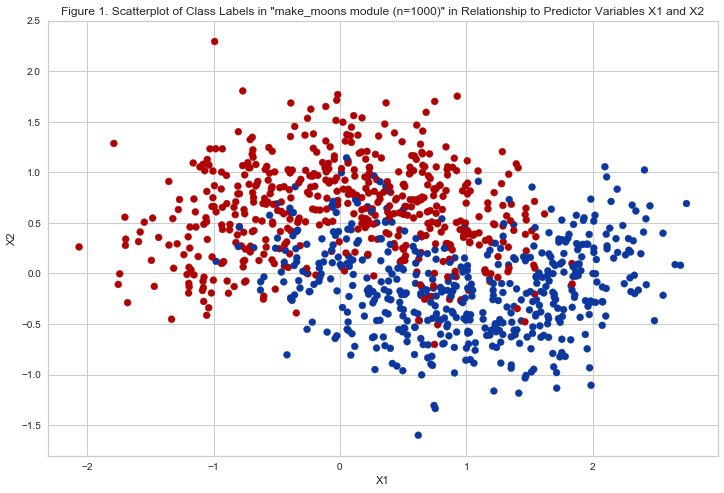

In [155]:
import sklearn
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import Grid

import random

#######################################################################################################################

#Part (a): Create a synthetic dataset (with both features and targets). Use the make_moons module with the 
#parameter noise=0.35 to generate 1000 random samples.

moons_X, moons_Y = make_moons(n_samples=1000, noise=.35, random_state=1)

# Create dataframe of dataset with x,y, and class values per data point
moons_df = pd.DataFrame(dict(x=moons_X[:,0], y=moons_X[:,1], 
                         label=moons_Y))

moons_df.columns = ['X1','X2','label']

#######################################################################################################################

#Part (b): Plot data along X1 vs. X2 with different labels

print('(b) Scatterplot: Labels, Predictor Variables X1 and X2')
print('')

#Assign colors:
cmap_light = ListedColormap(['#f28080', '#7da0f2'])
cmap_bold = ListedColormap(['#af0303', '#0b379e'])

plt.figure(figsize=(12, 8))
plt.scatter(moons_df['X1'], moons_df['X2'], c = moons_df['label'], cmap=cmap_bold)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Figure 1. Scatterplot of Class Labels in "make_moons module (n=1000)" in Relationship to Predictor Variables X1 and X2')
plt.show()

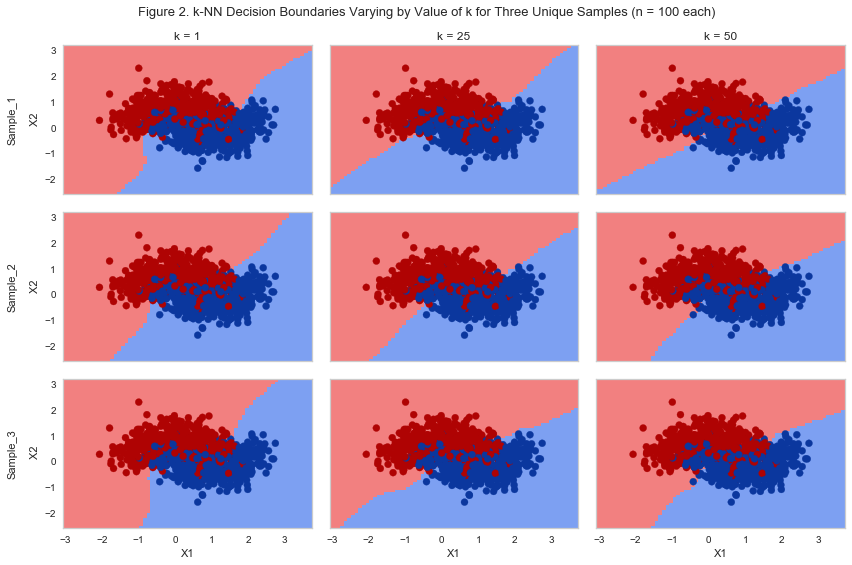

In [156]:
#Part (c): Fit k-NNs to 3 samples with different values of k (k = {1, 25, 50})

#Create 3 samples of 100 each 

#First, make 3x samples:

sample_1 = moons_df.sample(n=100, random_state=1)
sample_2 = moons_df.sample(n=100, random_state=2)
sample_3 = moons_df.sample(n=100, random_state=3)

#Part 2:  Fit k-NNs to each sample, using k = 1, 25, and 50

#Sample_1: Fit k-NN for k = 1

sample_1_k_1 = KNeighborsClassifier(n_neighbors = 1)
sample_1_k_1.fit(sample_1[['X1', 'X2']], sample_1['label'])

#Sample_1: Fit k-NN for k = 25

sample_1_k_25 = KNeighborsClassifier(n_neighbors = 25)
sample_1_k_25.fit(sample_1[['X1', 'X2']], sample_1['label'])

#Sample_1: Fit k-NN for k = 50

sample_1_k_50 = KNeighborsClassifier(n_neighbors = 50)
sample_1_k_50.fit(sample_1[['X1', 'X2']], sample_1['label'])

#Sample_2: Fit k-NN for k = 1

sample_2_k_1 = KNeighborsClassifier(n_neighbors = 1)
sample_2_k_1.fit(sample_2[['X1', 'X2']], sample_2['label'])

#Sample_2: Fit k-NN for k = 25

sample_2_k_25 = KNeighborsClassifier(n_neighbors = 25)
sample_2_k_25.fit(sample_2[['X1', 'X2']], sample_2['label'])

#Sample_2: Fit k-NN for k = 50

sample_2_k_50 = KNeighborsClassifier(n_neighbors = 50)
sample_2_k_50.fit(sample_2[['X1', 'X2']], sample_2['label'])

#Sample_3: Fit k-NN for k = 1

sample_3_k_1 = KNeighborsClassifier(n_neighbors = 1)
sample_3_k_1 .fit(sample_3[['X1', 'X2']], sample_3['label'])

#Sample_3: Fit k-NN for k = 25

sample_3_k_25 = KNeighborsClassifier(n_neighbors = 25)
sample_3_k_25.fit(sample_3[['X1', 'X2']], sample_3['label'])

#Sample_3: Fit k-NN for k = 50
sample_3_k_50 = KNeighborsClassifier(n_neighbors = 50)
sample_3_k_50.fit(sample_3[['X1', 'X2']], sample_3['label'])

#######################################################################################################################

#Part (d): Plot decision boundaries for each combination of sample and k-value

# Setup map of X & Y:
X_min, X_max = moons_df['X1'].min() - 1, moons_df['X1'].max() + 1
Y_min, Y_max = moons_df['X2'].min() - 1, moons_df['X2'].max() + 1
xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.1), 
                     np.arange(Y_min, Y_max, 0.1))

# Setup figure properties:
fig = plt.figure(figsize=(12, 8))
grid = Grid(fig, rect=111, nrows_ncols=(3,3), axes_pad=0.25, label_mode='L')
fig.suptitle('Figure 2. k-NN Decision Boundaries Varying by Value of k for Three Unique Samples (n = 100 each)', fontsize=13)

#Sample_1, k = 1 decision boundary:

sample_1_k_1_preds = sample_1_k_1.predict(np.c_[xx.ravel(), yy.ravel()])

sample_1_k_1_preds = sample_1_k_1_preds.reshape(xx.shape)

grid[0].pcolormesh(xx, yy, sample_1_k_1_preds, cmap = cmap_light)
grid[0].scatter(moons_df['X1'], moons_df['X2'], c = moons_df['label'], cmap = cmap_bold)
grid[0].set_ylabel('Sample_1\n\n X2')
grid[0].set_title('\n\nk = 1')    

#Sample_1, k = 25 decision boundary:

sample_1_k_25_preds = sample_1_k_25.predict(np.c_[xx.ravel(), yy.ravel()])

sample_1_k_25_preds = sample_1_k_25_preds.reshape(xx.shape)

grid[1].pcolormesh(xx, yy, sample_1_k_25_preds, cmap=cmap_light)
grid[1].scatter(moons_df['X1'], moons_df['X2'], c = moons_df['label'], cmap = cmap_bold)
grid[1].set_title('Decision Boundaries')  
grid[1].set_title('\n\nk = 25')  

#Sample_1, k = 50 decision boundary:

sample_1_k_50_preds = sample_1_k_50.predict(np.c_[xx.ravel(), yy.ravel()])

sample_1_k_50_preds = sample_1_k_50_preds.reshape(xx.shape)

grid[2].pcolormesh(xx, yy, sample_1_k_50_preds, cmap=cmap_light)
grid[2].scatter(moons_df['X1'], moons_df['X2'], c = moons_df['label'], cmap = cmap_bold)
grid[2].set_title('\n\nk = 50')  

#Sample_2, k = 1 decision boundary:

sample_2_k_1_preds = sample_2_k_1.predict(np.c_[xx.ravel(), yy.ravel()])

sample_2_k_1_preds = sample_2_k_1_preds.reshape(xx.shape)

grid[3].pcolormesh(xx, yy, sample_2_k_1_preds, cmap = cmap_light)
grid[3].scatter(moons_df['X1'], moons_df['X2'], c = moons_df['label'], cmap = cmap_bold)
grid[3].set_ylabel('Sample_2\n\n X2')    

#Sample_2, k = 25 decision boundary:

sample_2_k_25_preds = sample_2_k_25.predict(np.c_[xx.ravel(), yy.ravel()])

sample_2_k_25_preds = sample_2_k_25_preds.reshape(xx.shape)

grid[4].pcolormesh(xx, yy, sample_2_k_25_preds, cmap=cmap_light)
grid[4].scatter(moons_df['X1'], moons_df['X2'], c = moons_df['label'], cmap = cmap_bold) 

#Sample_2, k = 50 decision boundary:

sample_2_k_50_preds = sample_2_k_50.predict(np.c_[xx.ravel(), yy.ravel()])

sample_2_k_50_preds = sample_2_k_50_preds.reshape(xx.shape)

grid[5].pcolormesh(xx, yy, sample_2_k_50_preds, cmap=cmap_light)
grid[5].scatter(moons_df['X1'], moons_df['X2'], c = moons_df['label'], cmap = cmap_bold)

#Sample_3, k = 1 decision boundary:

sample_3_k_1_preds = sample_3_k_1.predict(np.c_[xx.ravel(), yy.ravel()])

sample_3_k_1_preds = sample_3_k_1_preds.reshape(xx.shape)

grid[6].pcolormesh(xx, yy, sample_3_k_1_preds, cmap = cmap_light)
grid[6].scatter(moons_df['X1'], moons_df['X2'], c = moons_df['label'], cmap = cmap_bold)
grid[6].set_ylabel('Sample_3\n\n X2')
grid[6].set_xlabel("X1")

#Sample_3, k = 25 decision boundary:

sample_3_k_25_preds = sample_3_k_25.predict(np.c_[xx.ravel(), yy.ravel()])

sample_3_k_25_preds = sample_3_k_25_preds.reshape(xx.shape)

grid[7].pcolormesh(xx, yy, sample_3_k_25_preds, cmap=cmap_light)
grid[7].scatter(moons_df['X1'], moons_df['X2'], c = moons_df['label'], cmap = cmap_bold) 
grid[7].set_xlabel("X1")

#Sample_3, k = 50 decision boundary:

sample_3_k_50_preds = sample_3_k_50.predict(np.c_[xx.ravel(), yy.ravel()])

sample_3_k_50_preds = sample_3_k_50_preds.reshape(xx.shape)

grid[8].pcolormesh(xx, yy, sample_3_k_50_preds, cmap=cmap_light)
grid[8].scatter(moons_df['X1'], moons_df['X2'], c = moons_df['label'], cmap = cmap_bold)
grid[8].set_xlabel("X1")

# Plot final figure for Part (d):

plt.tight_layout()
plt.show()

**Part (e): What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?**

Each row has similar decision boundary intersection edges which are more common with members of the row (i.e. within same sample) than with other rows (i.e., different samples). This makes senses, since each sample is unique and will have unique distributions of target variables across X1 and X2, which are being assessed by each k-NN model regardless of the value of k. When looking across each column, a clear pattern emerges for each sample group. There is the highest degree of "curviness" (i.e., non-linearity) of the decision boundaries derived from the k=1 values. The k=25 column shows minimal departure from linear decision boundaries, similar to the k=50 column. 

The column of (k=1) k-NN models appear to best separate teh two classes of data. This makes sense, since the k=1 models are the most flexible and fitting decision boundaries through each labeled point, thus yielding the highest classification accuracy. 

The same column (k=1) k-NN models also vary the most with changes in the data (i.e., across different samples). This also makes sense, since these models are overfitting the data and have the highest variance, reflected as greater relative model changes (and greater resulting decision boundary changes). 

**Part (f): Explain the bias-variance tradeoff using the example of the plots you made in this exercise.**

The bias-variance tradeoff is a relationship between bias and variance in a given data model which relates to test mean squared error (MSE). This is because:

$ \text{expected error (MSE) = }Var(model) + [Bias(model)]^2 + Var(\epsilon)$

In our example case, the k-NN model using k=1 has the highest test error due to the fact that the model has maximum variance. In this case, this means that changes to the data will result in a larger change in the model, relative to other higher k-value models. At the same time, our model at k=1 also has the lowest bias, as the model does not introduce error associated with approximating the variable relationships. At this point, our model has high variance and low bias. However, as our k value increases to k=24, the test error decreases at a large negative rate, due to the decrease in variance granted by a larger k-value. The change from k=1 to k=24 has an increase in bias, but this is not obviously reflected in the overall test error since much of the change in test error is produced by the decrease in variance. At k-values > 24, the model increases in test error. This slower increase in test error with increasing k-value is due to the ever-increasing model bias, which begins to exert a larger relative effect on overall test error compared to the decrease in error associated with continued decrease in variance. Ultimately, the increased bias results in an even larger increase in test error (at which point, changes in variance are likely negligible). This relationship between k-value and bias-variance changes is the tradeoff between these two sources of test error, observed in other models. 

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

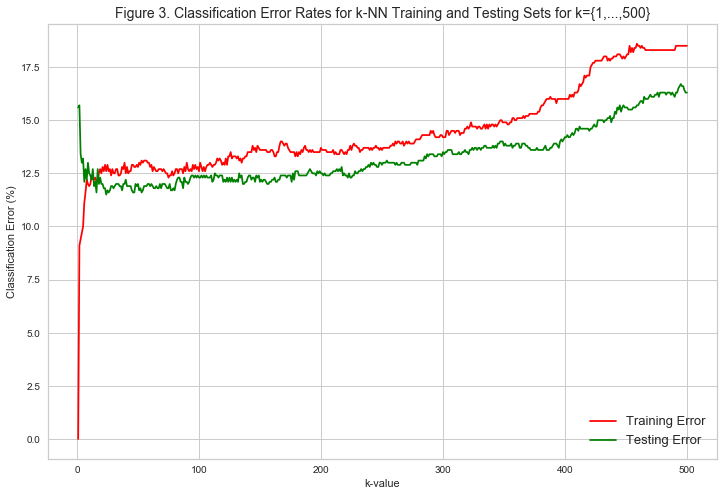

In [158]:
#Part (a): Generate random samples (from make_moons) of n = 1000 

import sklearn
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier 

import pandas as pd
import matplotlib.pyplot as plt

#First, generate the SAME (i.e., same random_state value) dataset from Q5:

moons_X, moons_Y = make_moons(n_samples=1000, noise=.35, random_state=1)

# Convert x, y, labels to dataframe: 

moons_df = pd.DataFrame(dict(x = moons_X[:,0], y = moons_X[:,1], label = moons_Y))

moons_df.columns = ['X1_train','X2_train','train_label']

# Create NEW dataset: n=1000, noise = 3.5 (different random state as previous)

moons_X_test, moons_Y_test = make_moons(n_samples=1000, noise=.35, random_state=2)

# Create appropriate test df with moons_X_test and moons_Y_test:

moons_df_test = pd.DataFrame(dict(x = moons_X_test[:,0], y = moons_X_test[:,1], label = moons_Y_test))

moons_df_test.columns = ['X1_test','X2_test','test_label']

#######################################################################################################################

#Part (b): Train new training data set on k= {1, 2, ..., 499, 500}, predict for test set, and calculate 
#classification error

train_error_list =[]
test_error_list =[]
k_vals = range(1,501)

# Generate generic k-NN model:

k_NN = KNeighborsClassifier()

# Iterate through list of k values and train each k-NN model on same training data, predict labels, and identify both
# training and testing error rates

for k in k_vals: 
    k_NN.n_neighbors = k 
    k_NN.fit(moons_df[['X1_train', 'X2_train']], moons_df['train_label'])
    kNN_training_score =k_NN.score(moons_df[['X1_train', 'X2_train']], moons_df['train_label'])
    train_error = (1 - kNN_training_score) * 100
    kNN_test_score = k_NN.score(moons_df_test[['X1_test', 'X2_test']], moons_df_test['test_label'])
    test_error = (1 - kNN_test_score) * 100
    train_error_list.append(train_error)
    test_error_list.append(test_error)
    
# Plot of training vs. testing error rates:

plt.figure(figsize=(12, 8))
plt.title('Figure 3. Classification Error Rates for k-NN Training and Testing Sets for k={1,...,500}', fontsize = 14)
plt.plot(k_vals, train_error_list, color='red', label= 'Training Error')
plt.plot(k_vals, test_error_list, color='green', label= 'Testing Error')
plt.legend(loc = 'lower right', fontsize = 13)
plt.xlabel('k-value')
plt.ylabel('Classification Error (%)')  
plt.show()

**Part (c): What trends do you notice in results?**

I notice that starting from k=1 the training error increases very quickly to approximately 12.5% classification error rate with small increases in the value of k (up to approximately k=25), while testing error decreases from above 15% to under 12.5% with the same increase in k. After approximately k = 25, both the training error and testing error increase at a similar rate with increasing k values up to k=500. Also of note, at approximately k>=400 both the training and testing error start to increase at higher rates with increasing values of k. 

**Part (d): What values of k represent high bias and which represent high variance?**

Smaller values of k generally represent higher variance and lower bias. Conversely, larger values of k generally represent lower variance and higher bias. In our models, we can see that the increase in k from k=1 results in a decrease in variance and subsequent decrease in classification error of testing data; however, classification error begins to increase after reaching a local minimum with progressively increasing values of k > 25 (likely due to increasing bias of the model). 

In [159]:
#Part (e): What is the optimal value of  kk  and why?

#Calculate local minimum of testing error:

min_index = test_error_list.index(min(test_error_list))
k_min_error = k_vals[min_index]

print('Optimal value: k = {}'.format(k_min_error))

Optimal value: k = 24


**Part (e): What is the optimal value of  k  and why?**

The optimal value of k is **k = 24**. The optimal value of k is the value of k with which a k-NN training model achieves the lowest classification error; thus, k = 24 is the optimal value since it is at this value that the k-NN testing error rate is lowest.

**Part (f): In k-NN classifiers, the value of k controls the flexibility of the model; what controls the flexibility 
of other models?**

In general, other models' flexibility are determined by degrees of freedom. For example, in regression models that range between simple linear to polynomial models (e.g., splines) the increase in flexibility of the modeled curve is associated with increase in degrees of freedom (and non-linearity). 

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [160]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

Part (a): Scatterplot of Training Data


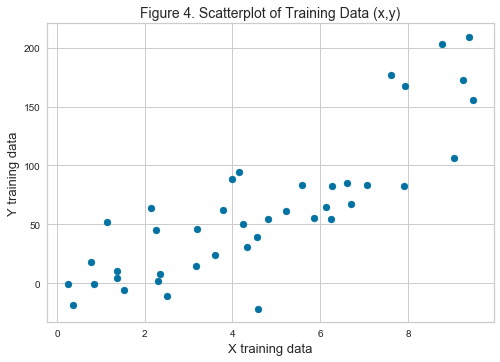

In [161]:
#Part (a): Create a scatterplot of data

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.polynomial.polynomial import polyfit
from pylab import rcParams
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.style import set_palette

print('Part (a): Scatterplot of Training Data')
plt.title('Figure 4. Scatterplot of Training Data (x,y)', fontsize=14)
plt.scatter(x_train, y_train)
plt.xlabel('X training data',fontsize=13)
plt.ylabel('Y training data',fontsize=13)
plt.show()

In [162]:
#Part (b): Estimate linear regression for the training data, calculate R^2 and MSE of test dataset:

# Convert lists to arrays for ease of use
X_train = np.array(x_train)
y_train = np.array(y_train)
X_test = np.array(x_test)
y_test = np.array(y_test)

# Reshape x array
X_train = np.reshape(X_train, (41,1))

# Train the model using the training sets
linear_model_x = LinearRegression()
linear_model_x.fit(X_train, y_train)

# Predictor y, using x testing dataset:
predicted_y = linear_model_x.predict(X_train)

# Linear Regression Output:
print('Part (b): Estimation of linear regression for training data with model outputs')
print('')
print('Linear regression model: y = {:.3f} + {:.3f}x'.format(linear_model_x.intercept_, float(linear_model_x.coef_)))
print('')
print('R\u00B2 = {:.3f}'.format(r2_score(y_train, predicted_y)))
print('')
print('Mean Squared Error (MSE) = {:.3f}'.format(mean_squared_error(y_train, predicted_y)))

Part (b): Estimation of linear regression for training data with model outputs

Linear regression model: y = -21.731 + 18.303x

R² = 0.701

Mean Squared Error (MSE) = 1052.585


Part (c): Linear Regression with Transformation

Rationale for transformation: In the scatterplot of x and y, there appears to be a quadratic shape to the data.
Thus, I am going to fit the model with this transformation and assess model fit.


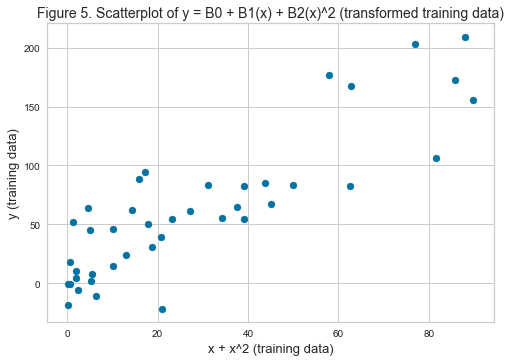

Linear Regression Model (w/ quadratic transformation): y = 8.007 + 0.471x + 1.832x²

R² = 0.749

Mean Squared Error (MSE) = 884.798


In [163]:
#Part (c): Transformation of the predictor variable that may make sense for these data. 
#This will be a multiple regression model of the form  y=a0+a1x1+a2x2+…+anxny=a0+a1x1+a2x2+…+anxn. 
#Here  xixi  could be any transformations of x. Provide the estimated equation for this multiple regression
#model (e.g. if you chose your predictors to be  x1=xx1=x  and  x2=log(x)x2=log(x) , your model would be of the 
#form  y=a0+a1x+a2log(x)y=a0+a1x+a2log(x) . Also provide the  R2R2  and mean square error of the fit for the 
#training data.

print('Part (c): Linear Regression with Transformation')
print('')
# Rationale for choosing transformation:
print('Rationale for transformation: In the scatterplot of x and y, there appears to be a quadratic shape to the data.\nThus, I am going to fit the model with this transformation and assess model fit.')

#Transformations:

plt.title('Figure 5. Scatterplot of y = B0 + B1(x) + B2(x)^2 (transformed training data)', fontsize=14)
plt.xlabel('x + x^2 (training data)',fontsize=13)
plt.ylabel('y (training data)',fontsize=13)
plt.scatter(np.square(X_train), y_train)
plt.show()

# Construct new array to represent x^2 + x:

X_train_squared = np.square(X_train)

X_train_transformation = np.column_stack((X_train, X_train_squared))

# Linear regression model of transformation:

linear_model_2 = LinearRegression()

linear_model_2.fit(X_train_transformation, y_train)

y_pred_transformed = linear_model_2.predict(X_train_transformation)

# Transformed Linear Regression Model Output:

print('Linear Regression Model (w/ quadratic transformation): y = {:.3f} + {:.3f}x + {:.3f}x\u00B2'.format(linear_model_2.intercept_, 
                                                                           float(linear_model_2.coef_[0]),
                                                                           float(linear_model_2.coef_[1])))
print('')
print('R\u00B2 = {:.3f}'.format(r2_score(y_train, y_pred_transformed)))
print('')
print('Mean Squared Error (MSE) = {:.3f}'.format(mean_squared_error(y_train, y_pred_transformed)))





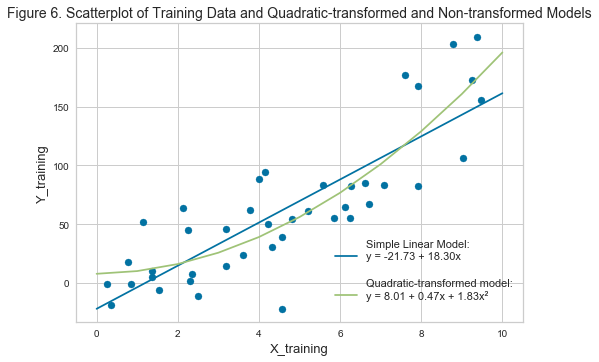

In [164]:
#Part (d): Plot Original Training Data w/ both Models as Curves:

#Plot original scatterplot and add lines with correct legends:

plt.scatter(X_train, y_train)
x_values = np.arange(11)
plt.title('Figure 6. Scatterplot of Training Data and Quadratic-transformed and Non-transformed Models', fontsize=14)
plt.plot(x_values, 
         linear_model_x.intercept_ +  float(linear_model_x.coef_)* x, 
         '-', 
         label = 'Simple Linear Model: \ny = {:.2f} + {:.2f}x \n'.format(linear_model_x.intercept_, 
                                                                         float(linear_model_x.coef_)))
plt.plot(x_values, 
         linear_model_2.intercept_ +  float(linear_model_2.coef_[0])* x + float(linear_model_2.coef_[1])* (x**2),
         '-', 
         label = 'Quadratic-transformed model:\ny = {:.2f} + {:.2f}x + {:.2f}x\u00B2\n'.format(linear_model_2.intercept_, 
                                                                                               float(linear_model_2.coef_[0]), 
                                                                                               float(linear_model_2.coef_[1])))
plt.legend(loc='lower right', fontsize = 11)
plt.xlabel('X_training',fontsize=13)
plt.ylabel('Y_training',fontsize=13)
plt.show()

In [165]:
#Part (e): Apply models (simple linear and quadratic-transformed) to the test data set:

print('Part (e): Applying Simple Linear Model and Quadratic-transformed Model to Test Data')
print('')
#Model 1: Simple Linear Regression 

x_test_1 = np.reshape(x_test, (9,1))
linear_model_x.fit(X_train, y_train)

# Predict test array
pred_y_test_mod_1 = linear_model_x.predict(x_test_1)

# Model 1 outputs:

print('Model 1--Simple Linear Reg. Model over Test Data:')
print('')
print('R\u00B2 = {:.3f}'.format(r2_score(y_test, pred_y_test)))
print('')
print('Mean Squared Error (MSE) = {:.3f}'.format(mean_squared_error(y_test, pred_y_test)))

#Model 2: Quadratic-transformed Linear Regression

# First, transform our x_test array:
x_test_squared = np.square(x_test)

# Next, create combined x + x^2 data array
x_test_transformed = np.column_stack((x_test, x_test_squared))

# Predict test data using constructed model 2:
pred_y_test_mod_2 = linear_model_2.predict(x_test_transformed)

# Model 2 outputs:
print('')
print('Model 2-- Quadratic-transformed Linear Reg. Model over Test Data:')
print('')
print('R\u00B2 : {:.3f}'.format(r2_score(y_test, pred_y_test_mod_2)))
print('')
print('Mean Squared Error: {:.3f}'.format(mean_squared_error(y_test, pred_y_test_mod_2)))

Part (e): Applying Simple Linear Model and Quadratic-transformed Model to Test Data

Model 1--Simple Linear Reg. Model over Test Data:

R² = 0.556

Mean Squared Error (MSE) = 2023.312

Model 2-- Quadratic-transformed Linear Reg. Model over Test Data:

R² : 0.693

Mean Squared Error: 1398.882


**Part (f): Which models perform better on the training data, and which on the test data? Why?**

The quadratic-transformed model (Model 2) performs better on the training data, since it returns $R^2$=0.749 (greater than that of simple linear model, $R^2$=0.701) and a lower MSE (884.798) than the simple linear model (1052.585). This indicates that the quadratic-transformed model has a higher proportion of variability in y that can be explained by using x (i.e., higher $R^2$), and it also has lower error associated with prediction of y from x training data. 

Similarly, the quadratic-transformed model (Model 2) also performs better on the test data, as it has a higher $R^2$=0.693 (compared to that of simple linear model, $R^2$=0.556) and a lower MSE (1398.882) than that of the simple linear model (2023.312). Similar to the above reasoning, the quadratic-transformed model having a higher $R^2$ and lower MSE suggest that it accounts for more of the variabiliy in y with x test data, and has lower error when predicting y from x.

**Part (g): Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?**

If our test data were significantly different from the training data, the predictive capability of our models could decrease significantly, and those models that were overfit to the data would have the greatest loss in relative predictive capability. Concerning our models, it could be stated that the model with lowest variance would perhaps not be as affected by changes in data, compared to models with higher variance. In our case, the higher variance model is that with the higher degrees of freedom (the quadratic-transformed model); this model would have to higher variance of predicted values of y if the underlying data had a non-quadratic relationship of f(x). Thus, the quadratic model (compared to a simple linear regression) would have its predictive capability relatively more reduced, for random changes in data distribution. 